In [180]:
# Setting
## The path & packages
'upload'
#### Draft um Gitupload
!git init 
!git add . 
!git commit -m "Kleine Verbesserungen"
!git push

Bestehendes Git-Repository in /Users/mandoholzknecht/SE_Risk_Management/.git/ neuinitialisiert
[main 2cfe356] Kleine Verbesserungen
 2 files changed, 100 insertions(+), 46 deletions(-)
Objekte aufzählen: 7, Fertig.
Zähle Objekte: 100% (7/7), Fertig.
Delta-Kompression verwendet bis zu 4 Threads.
Komprimiere Objekte: 100% (4/4), Fertig.
Schreibe Objekte: 100% (4/4), 1.10 KiB | 188.00 KiB/s, Fertig.
Gesamt 4 (Delta 2), Wiederverwendet 0 (Delta 0), Pack wiederverwendet 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/danIBK/SE_Risk_Management.git
   9716929..2cfe356  main -> main


In [2]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [3]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [4]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [5]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [6]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2020
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2020
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,556
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,164
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,163


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [7]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,157.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,157.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,157.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,157.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,157.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,157.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,157.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,157.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,154.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,150.00


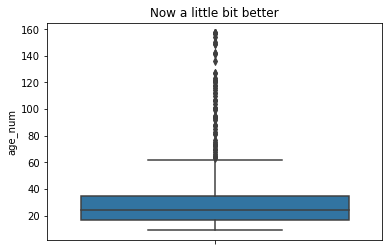

In [8]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

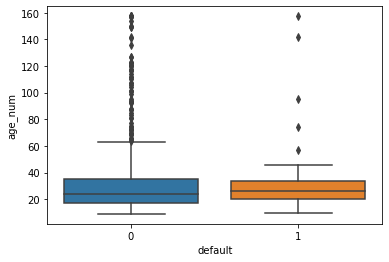

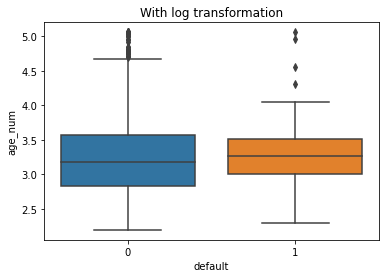

<Figure size 432x288 with 0 Axes>

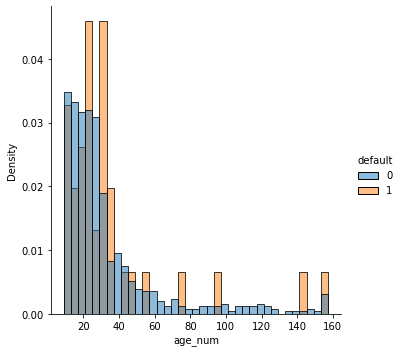

In [9]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(8.999, 12.0]","(12.0, 15.0]","(15.0, 19.0]","(19.0, 22.0]","(22.0, 24.0]","(24.0, 28.0]","(28.0, 31.0]","(31.0, 41.4]","(41.4, 65.0]","(65.0, 157.32]"
default,,,,,,,,,,
0,69,61,75,78,36,67,64,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [11]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2020-12-23 08:37 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8762    0.2531  -11.3634  0.0000  -3.3723  -2.3801
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [12]:
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 19, inclusive=True),
     df_train['age_num'].between(20, 29, inclusive=True),
     df_train['age_num'].between(30, 39, inclusive=True),
     df_train['age_num'].between(40, 49, inclusive=True),
     df_train['age_num'].between(50, 59, inclusive=True),
     df_train['age_num'].between(60, np.inf, inclusive=True)], 
    ['10-19','20-29','30-39','40-49','50-59','>59'],)

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,10-19,20-29,30-39,40-49,50-59,>59
default,,,,,,
0,205,206,81,44,27,68
1,9,12,10,2,1,4


In [13]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.018   
Dependent Variable:  default          AIC:              298.5732
Date:                2020-12-23 08:37 BIC:              325.6079
No. Observations:    669              Log-Likelihood:   -143.29 
Df Model:            5                LL-Null:          -145.89 
Df Residuals:        663              LLR p-value:      0.39087 
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -3.1258   0.3406 -9.1781 0.0000 -3.7933 -2.4583
age_cat[T.20-29]  0.2828   0.4519  0.6259 0.5314 -0.6028  1.1684
age_cat[T.30-39]  1.0339   0.4778  2.1637 0.0305  0.0974  1.9705
age_cat[T.40-49]  0.0347   0.7992  0.0435 0.9653 -

In [14]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [15]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [16]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [18]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

# Data cleaning

In [19]:
# # drop comp that sucks big time because no values
df_train = df_train.loc[df_train["id"] != 'C_620'] 

# get total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_st          668
bonds_payables_lt          668
trade_payables_lt          664
bonds_payables_mt          663
trade_payables_mt          647
trade_receivables_lt       644
bank_liabilities_lt        544
bank_liabilities_mt        482
trade_receivables_st       354
count_emp                  353
bank_liabilities_st        351
trade_payables_st          142
oth_interest_inc           126
oth_interest_exp            61
cash                        31
fin_result                  21
total_equity                20
gross_profit                 6
gross_performance            6
cf_operating                 1
cf_investment                1
cf_financing                 1
sales                        0
earn_from_op                 0
year_inc                     0
type_pl                      0
default                      0
sector                       0
legal_form                   0
zip_code                     0
total_liabilities            0
total_liabilities_lt         0
result_f

## Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [20]:

cor_er = df_train['total_equity'].corr(df_train['total_result'])
cor_ea = df_train['total_equity'].corr(df_train['total_assets'])
cor_eo = df_train['total_equity'].corr(df_train['cf_operating'])


Split training and prediction dataset

In [21]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


Replace the missing values with predicted values

In [23]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred

## Financial ratios

We use two liquidity ratios (measure a companies ability to meet its short term dept obligations) that we will weight as one to circumvent overfitting

1. working capital ratio = current assets/current liabilities (use log because of skewed data)

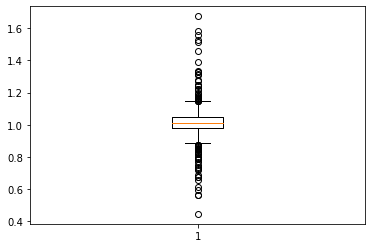

In [24]:
tr = df_train
tr['wc_ratio'] = np.log(tr['current_assets'])/np.log(tr['total_liabilities_st'])
plt.boxplot(tr.wc_ratio)
plt.show()

2. operating cash flow ratio = operating cf/current liabilities

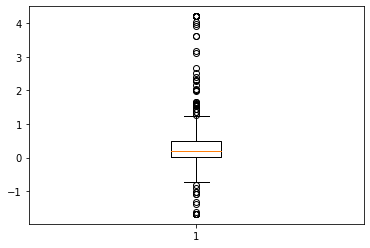

In [25]:
cf_pos = np.where(tr['cf_operating'] > 1, tr['cf_operating'], 0)
cf_neg = np.where(tr['cf_operating'] < -1, tr['cf_operating'], 0)
ocf = tr['cf_operating']/tr['total_liabilities_st']
# winsorize ocf
tr['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.015])
plt.boxplot(tr.ocf_ratio)
plt.show()

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

1. equity ratio = tot equity/total assets

0      0.982774
1      0.942056
2      0.608816
3      0.968864
4      0.958023
         ...   
664    0.897327
665    0.924091
666    0.000000
667    0.000000
668    0.797995
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.840919
std        0.244647
min        0.000000
25%        0.845883
50%        0.920100
75%        0.957211
max        1.195405
Name: equity_ratio, dtype: float64


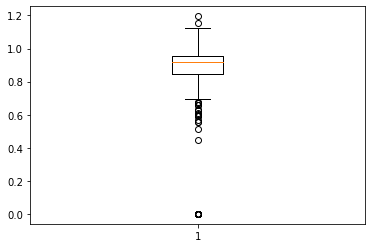

In [26]:
tr['equity_ratio'] = np.where(tr['total_equity'] > 1, np.log(tr['total_equity'])/np.log(tr['total_assets']), 0)
print(tr.equity_ratio)
print(tr.equity_ratio.describe())
plt.boxplot(tr.equity_ratio)
plt.show()

2. debt to equity ratio = total dept/total equity

In [27]:
tr['debt_to_equity'] = np.where(tr['total_equity'] > 1, np.log(tr['total_liabilities'])/np.log(tr['total_equity']), 0)
print(tr.debt_to_equity.describe())
print(tr.debt_to_equity)
print(tr.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(tr.dept_to_equity)
plt.show()

count    668.000000
mean       1.004309
std        0.316616
min        0.000000
25%        0.966739
50%        1.042361
75%        1.133423
max        2.224372
Name: debt_to_equity, dtype: float64
0      0.939680
1      1.029047
2      1.469820
3      0.911417
4      1.014277
         ...   
664    1.100888
665    1.050137
666    0.000000
667    0.000000
668    1.249817
Name: debt_to_equity, Length: 668, dtype: float64
0.000000    46
1.316672     1
0.919248     1
1.140547     1
1.066038     1
            ..
1.110377     1
1.011722     1
1.234334     1
1.052017     1
1.009615     1
Name: debt_to_equity, Length: 623, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'dept_to_equity'

Create a dataframe with financial ratios and a heatmap to check for correlation between ratios

   wc_ratio  ocf_ratio  equity_ratio  debt_to_equity
0  1.103570   0.949635      0.982774        0.939680
1  0.974001  -0.617484      0.942056        1.029047
2  1.075391   1.130863      0.608816        1.469820
3  1.078651   0.665113      0.968864        0.911417
4  0.883952   0.374604      0.958023        1.014277
5  1.313287   3.180455      0.993943        0.765812
6  0.990158   0.394165      0.979141        0.969815
7  1.020241   2.055528      0.995213        0.893858
8  0.944483   0.023414      0.915823        1.077684
9  0.974708   0.278993      0.974618        0.943916
<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 668
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wc_ratio        668 non-null    float64
 1   ocf_ratio       668 non-null    float64
 2   equity_ratio    668 non-null    float64
 3   debt_to_equity  668 non-null    float64
dtypes: float64(4)
memory usage: 46.1 KB
No

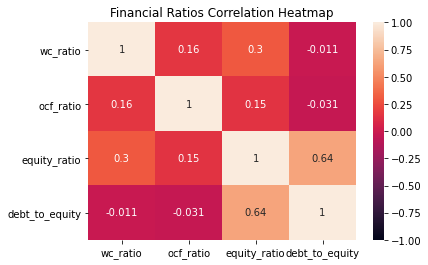

In [75]:
col = ['wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Financial Ratios Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio
- Cash

In [29]:
df_train

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,cf_investment,cf_financing,age_num,age_quartile,age_cat,total_liabilities,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,-1.112342e+06,-7520392.09,120.0,"(65.0, 157.32]",>59,1.136445e+07,1.103570,0.949635,0.982774,0.939680
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,1.174427e+06,1128108.08,44.0,"(41.4, 65.0]",40-49,7.034964e+06,0.974001,-0.617484,0.942056,1.029047
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,-7.536444e+06,-22026.07,58.0,"(41.4, 65.0]",50-59,8.457608e+06,1.075391,1.130863,0.608816,1.469820
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,-6.561222e+05,-169655.66,48.0,"(41.4, 65.0]",40-49,2.793219e+06,1.078651,0.665113,0.968864,0.911417
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,-1.419776e+08,12567030.80,112.0,"(65.0, 157.32]",>59,6.044734e+08,0.883952,0.374604,0.958023,1.014277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,C_637,0,GmbH,82041,46410,1977,NaN,GKV,2.804500e+07,2.804500e+07,...,-2.581574e+05,845.29,43.0,"(41.4, 65.0]",40-49,1.292400e+07,0.988866,0.026441,0.897327,1.100888
665,C_091,0,GmbH,85716,70210,2000,64.0,GKV,5.175343e+06,5.241814e+06,...,-4.270350e+04,77968.25,20.0,"(19.0, 22.0]",20-29,9.117692e+05,1.014079,-0.475269,0.924091,1.050137
666,C_707,0,GmbH,85521,46693,2000,NaN,GKV,4.307021e+07,4.307021e+07,...,-4.940000e+05,-1400459.36,20.0,"(19.0, 22.0]",20-29,3.628583e+08,0.831547,0.009356,0.000000,0.000000
667,C_323,0,GmbH & Co. KG,82031,68320,2007,NaN,GKV,1.843728e+05,1.843728e+05,...,-2.630540e+03,-9788.00,13.0,"(12.0, 15.0]",10-19,1.146466e+05,0.958271,0.220748,0.000000,0.000000


## Working Capital Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.010   
Dependent Variable: default          AIC:              292.8194
Date:               2020-12-23 08:51 BIC:              301.8279
No. Observations:   668              Log-Likelihood:   -144.41 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.091594
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept    -0.1650    1.5170  -0.1088  0.9134  -3.1383  2.8083
wc_ratio     -2.6398    1.5252  -1.7308  0.0835  -5.6291  0.3495



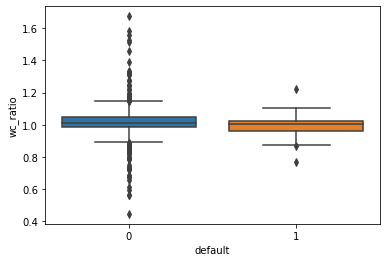

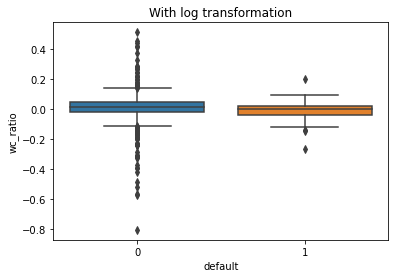

<Figure size 432x288 with 0 Axes>

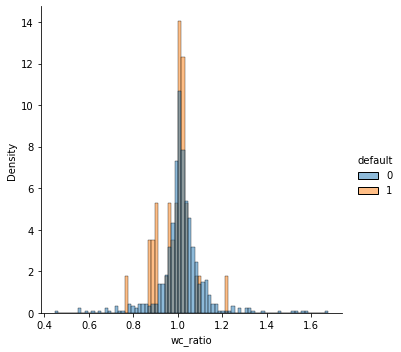

In [33]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: default          AIC:              294.8796
Date:               2020-12-23 08:58 BIC:              303.8881
No. Observations:   668              Log-Likelihood:   -145.44 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.37534 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.7471    0.1779  -15.4442  0.0000  -3.0957  -2.3984
ocf_ratio  -0.2042    0.2428   -0.8409  0.4004  -0.6801   0.2717



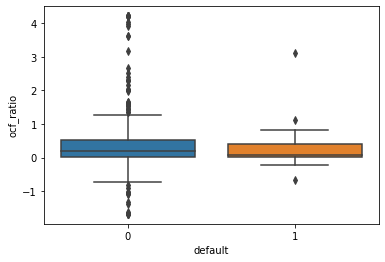

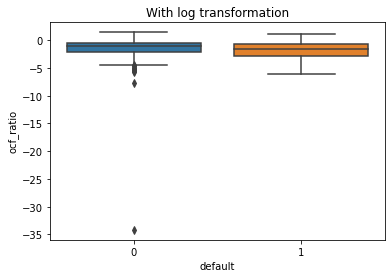

<Figure size 432x288 with 0 Axes>

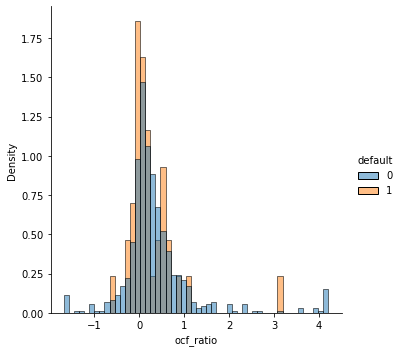

In [45]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.017   
Dependent Variable: default          AIC:              290.6460
Date:               2020-12-23 09:11 BIC:              299.6546
No. Observations:   668              Log-Likelihood:   -143.32 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.025064
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -1.8261   0.4139 -4.4122 0.0000 -2.6372 -1.0149
equity_ratio    -1.2253   0.5008 -2.4465 0.0144 -2.2069 -0.2437



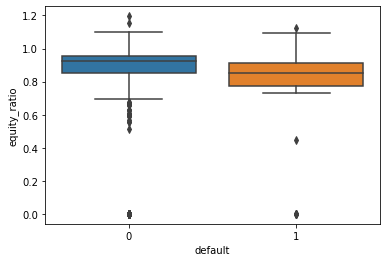

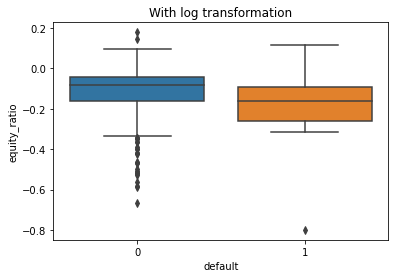

<Figure size 432x288 with 0 Axes>

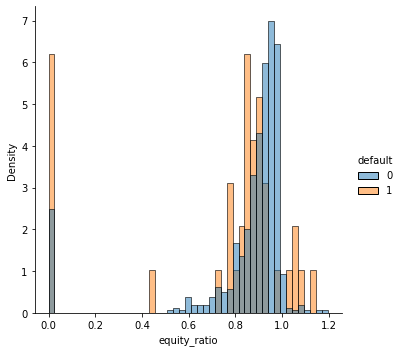

In [58]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [66]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

equity_ratio,False,True
default,,
0,590,40
1,32,6


## Debt to Equity Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: default          AIC:              294.8629
Date:               2020-12-23 09:01 BIC:              303.8715
No. Observations:   668              Log-Likelihood:   -145.43 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.37033 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -2.3762   0.4845 -4.9041 0.0000 -3.3258 -1.4265
debt_to_equity  -0.4392   0.4730 -0.9285 0.3531 -1.3661  0.4878



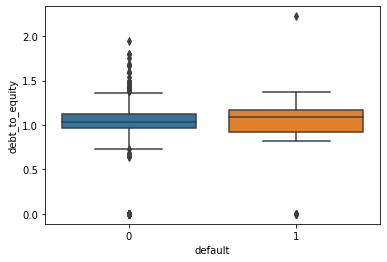

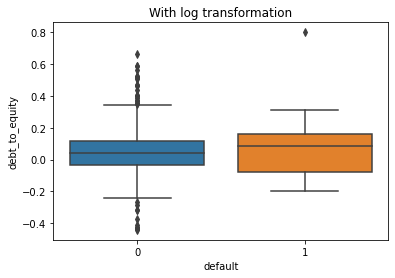

<Figure size 432x288 with 0 Axes>

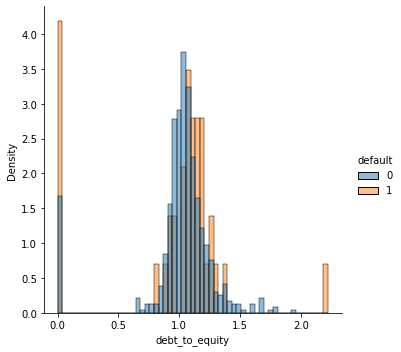

In [47]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: default          AIC:              264.7221  
Date:               2020-12-23 09:01 BIC:              273.6356  
No. Observations:   637              Log-Likelihood:   -130.36   
Df Model:           1                LL-Null:          -138.40   
Df Residuals:       635              LLR p-value:      6.0787e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -2.4119    0.1926  -12.5247  0.0000  -2.7893  -2.0344
cash         -0.0000    0.0000   -2.0864  0.0369  -0.0000  -0.0000



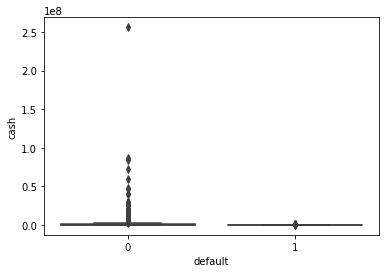

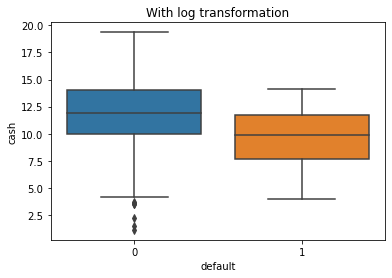

<Figure size 432x288 with 0 Axes>

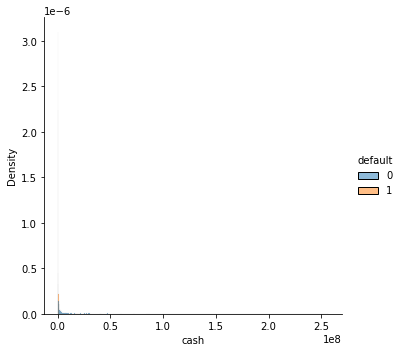

In [48]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

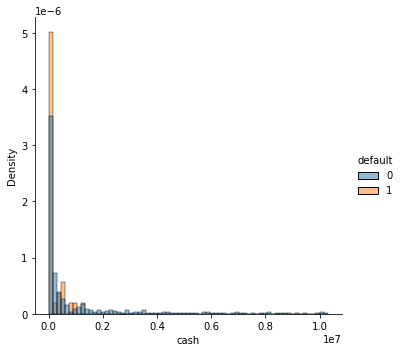

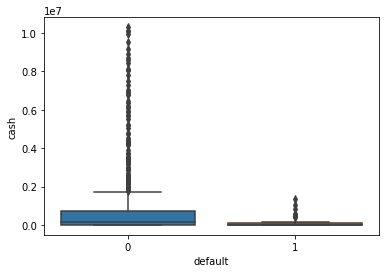

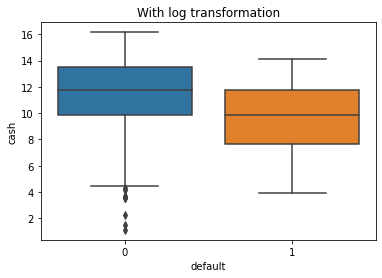

In [72]:
# See better histogram of cash
x = df_train[df_train["cash"] < df_train["cash"].quantile(0.95)]
sns.displot(x,x="cash",hue="default",stat="density",common_norm=False);
plt.figure()
sns.boxplot(y="cash",x="default",data=x);
plt.figure()
sns.boxplot(y=np.log(x["cash"]),x="default",
            data=x).set_title("With log transformation");


# Our Logit Regression

In [74]:
df_train

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,cf_investment,cf_financing,age_num,age_quartile,age_cat,total_liabilities,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,-1.112342e+06,-7520392.09,120.0,"(65.0, 157.32]",>59,1.136445e+07,1.103570,0.949635,0.982774,0.939680
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,1.174427e+06,1128108.08,44.0,"(41.4, 65.0]",40-49,7.034964e+06,0.974001,-0.617484,0.942056,1.029047
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,-7.536444e+06,-22026.07,58.0,"(41.4, 65.0]",50-59,8.457608e+06,1.075391,1.130863,0.608816,1.469820
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,-6.561222e+05,-169655.66,48.0,"(41.4, 65.0]",40-49,2.793219e+06,1.078651,0.665113,0.968864,0.911417
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,-1.419776e+08,12567030.80,112.0,"(65.0, 157.32]",>59,6.044734e+08,0.883952,0.374604,0.958023,1.014277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,C_637,0,GmbH,82041,46410,1977,NaN,GKV,2.804500e+07,2.804500e+07,...,-2.581574e+05,845.29,43.0,"(41.4, 65.0]",40-49,1.292400e+07,0.988866,0.026441,0.897327,1.100888
665,C_091,0,GmbH,85716,70210,2000,64.0,GKV,5.175343e+06,5.241814e+06,...,-4.270350e+04,77968.25,20.0,"(19.0, 22.0]",20-29,9.117692e+05,1.014079,-0.475269,0.924091,1.050137
666,C_707,0,GmbH,85521,46693,2000,NaN,GKV,4.307021e+07,4.307021e+07,...,-4.940000e+05,-1400459.36,20.0,"(19.0, 22.0]",20-29,3.628583e+08,0.831547,0.009356,0.000000,0.000000
667,C_323,0,GmbH & Co. KG,82031,68320,2007,NaN,GKV,1.843728e+05,1.843728e+05,...,-2.630540e+03,-9788.00,13.0,"(12.0, 15.0]",10-19,1.146466e+05,0.958271,0.220748,0.000000,0.000000


In [133]:
mdl1 = sm.Logit.from_formula('default ~ wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + cash  + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.069    
Dependent Variable: default          AIC:              269.7178 
Date:               2020-12-23 10:00 BIC:              296.4584 
No. Observations:   637              Log-Likelihood:   -128.86  
Df Model:           5                LL-Null:          -138.40  
Df Residuals:       631              LLR p-value:      0.0018554
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
Intercept         -1.1565   1.7448 -0.6628 0.5075 -4.5763 2.2634
wc_ratio          -0.8594   1.8308 -0.4694 0.6388 -4.4476 2.7289
ocf_ratio         -0.1302   0.2616 -0.4977 0.6187 -0.6430 0.3825
equity_ratio      -1.0550   0.9061 -1.1643 0.2443 

In [113]:
y = df_train["default"]
X = df_train[["wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","cash"]]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.203382
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.068    
Dependent Variable: default          AIC:              283.7188 
Date:               2020-12-23 09:39 BIC:              310.7445 
No. Observations:   668              Log-Likelihood:   -135.86  
Df Model:           5                LL-Null:          -145.83  
Df Residuals:       662              LLR p-value:      0.0012788
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
const             -0.8404   1.5045 -0.5586 0.5764 -3.7892 2.1083
wc_ratio          -1.0391   1.5731 -0.6605 0.5089 -4.1223 2.0442
ocf_ratio         -0.0866   0.2513 -0.3446 0.7304 -0.5792 0.4060
equity_ratio      -1.1132   0.8640 -1.2883 0.1976 -2.8067 0.5803
debt_to_equity     0.3368   0.6055  0.5562 0.5781 -0.8500 1.5236
cash              -0.0000   0.0000 -1.9227 0.0545 -0.0000 0.0000
================================================================

"""

In [171]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
450,0,18.32
447,0,17.68
446,0,16.21
449,0,16.13
448,0,16.05
...,...,...
487,0,0.00
476,0,0.00
440,0,0.00
432,0,0.00


In [184]:
s[s["default"] == 1]

,default,estimated PD in %
32,1,8.44
43,1,9.20
69,1,9.78
104,1,6.06
114,1,7.39
120,1,7.46
128,1,7.90
139,1,6.09
150,1,7.71
198,1,12.05


# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini

Test fabio